<a href="https://colab.research.google.com/github/rishabh3562/DA/blob/main/colab/ibm/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1: Extracting Tesla Stock Data Using yfinance

In [ ]:
import yfinance as yf

# Step 1: Download Tesla stock data (e.g., last 1 year)
tesla_data = yf.download('TSLA', period='1y')

# Step 2: Reset the index
tesla_data.reset_index(inplace=True)

# Step 3: Save the dataframe to a CSV file
tesla_data.to_csv('tesla_data.csv', index=False)

# Step 4: Display the first 5 rows of the dataframe
tesla_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2024-02-05,181.059998,184.679993,175.009995,184.259995,134294400
1,2024-02-06,185.100006,186.490005,177.110001,177.210007,122676000
2,2024-02-07,187.580002,189.789993,182.679993,188.179993,111535200
3,2024-02-08,189.559998,191.619995,185.580002,189.000000,83034000
4,2024-02-09,193.570007,194.119995,189.479996,190.179993,84476300


## Question 2: Extracting Tesla Revenue Data Using Web Scraping

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define URL and headers to mimic a browser request
url = "https://companiesmarketcap.com/inr/tesla/revenue/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Fetch the webpage
response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")

    # Locate the revenue table (adjust class/ID based on actual HTML)
    table = soup.find("table", {"class": "table"})  # Replace "table" with the correct class

    if table:
        rows = table.find_all("tr")[1:]  # Skip header row
        data = []

        for row in rows:
            cols = row.find_all("td")
            if len(cols) >= 2:
                year = cols[0].get_text(strip=True)
                revenue_inr = cols[1].get_text(strip=True)
                data.append({"Year": year, "Revenue (INR)": revenue_inr})

        # Create a DataFrame and print results
        df = pd.DataFrame(data)
        print(df)
    else:
        print("Revenue table not found.")
else:
    print(f"Failed to fetch page. Status code: {response.status_code}")

    Year Revenue (INR)
0   2024      ₹8.380 T
1   2023      ₹8.056 T
2   2022      ₹6.740 T
3   2021      ₹4.006 T
4   2020      ₹2.306 T
5   2019      ₹1.752 T
6   2018      ₹1.500 T
7   2017     ₹750.80 B
8   2016     ₹475.69 B
9   2015     ₹268.87 B
10  2014     ₹202.70 B
11  2013     ₹124.39 B
12  2012      ₹22.62 B
13  2011      ₹10.80 B
14  2010       ₹5.23 B
15  2009       ₹5.19 B


## Question 3: Extracting GameStop Stock Data Using yfinance

In [ ]:
import yfinance as yf

# Define the ticker symbol and time range
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index and save to CSV
gme_data.reset_index(inplace=True)
gme_data.to_csv("gme_stock_data.csv")

# Display the first five rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Extracting GameStop Revenue Data Using Web Scraping


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Fetch GME revenue data (replace URL if needed)
url = "https://companiesmarketcap.com/inr/gamestop/revenue/"
headers = {"User-Agent": "Mozilla/5.0"}  # Avoid bot detection
response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    table = soup.find("table", {"class": "table"})  # Verify class name

    # Extract revenue data
    gme_revenue = []
    rows = table.find_all("tr")[1:]  # Skip header

    for row in rows:
        cols = row.find_all("td")
        year = cols[0].text.strip()
        revenue = cols[1].text.strip()
        gme_revenue.append({"Year": year, "Revenue (INR)": revenue})

    gme_revenue = pd.DataFrame(gme_revenue)
    print(gme_revenue.tail())  # Show last 5 rows
else:
    print("Failed to fetch data.")

    Year Revenue (INR)
19  2005     ₹139.13 B
20  2004      ₹79.80 B
21  2003      ₹71.88 B
22  2002      ₹64.87 B
23  2001      ₹54.09 B


## Question 5: Tesla Stock and Revenue Dashboard

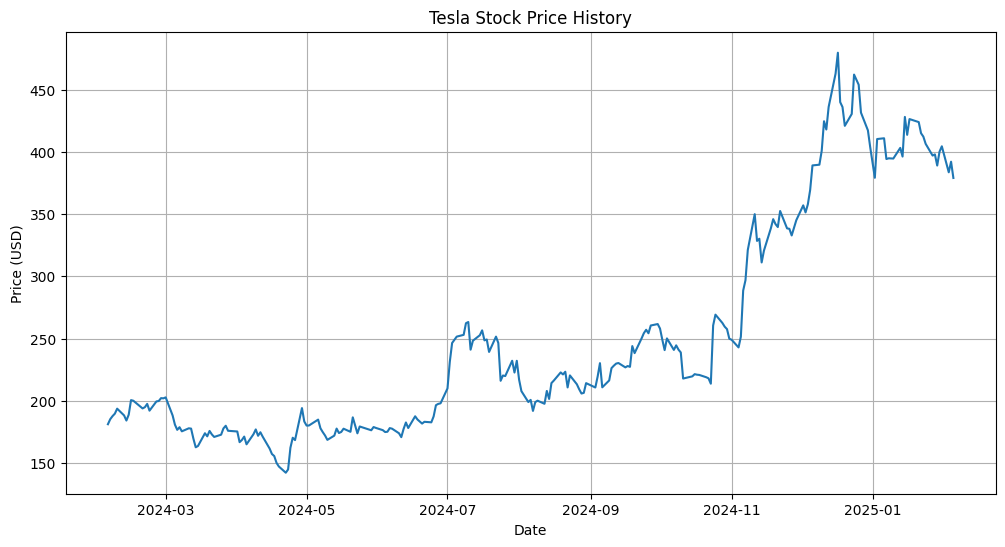

In [ ]:
import matplotlib.pyplot as plt

def make_graph(df, title, filename="stock_graph.png"):
    plt.figure(figsize=(12, 6))
    plt.plot(df["Date"], df["Close"], label="Closing Price")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid(True)
    plt.savefig(filename)
    plt.show()
# Assuming `tesla_data` is already loaded (from Question 1)
make_graph(tesla_data, "Tesla Stock Price History", "tesla_stock.png")

## Question 6: GameStop Stock and Revenue Dashboard

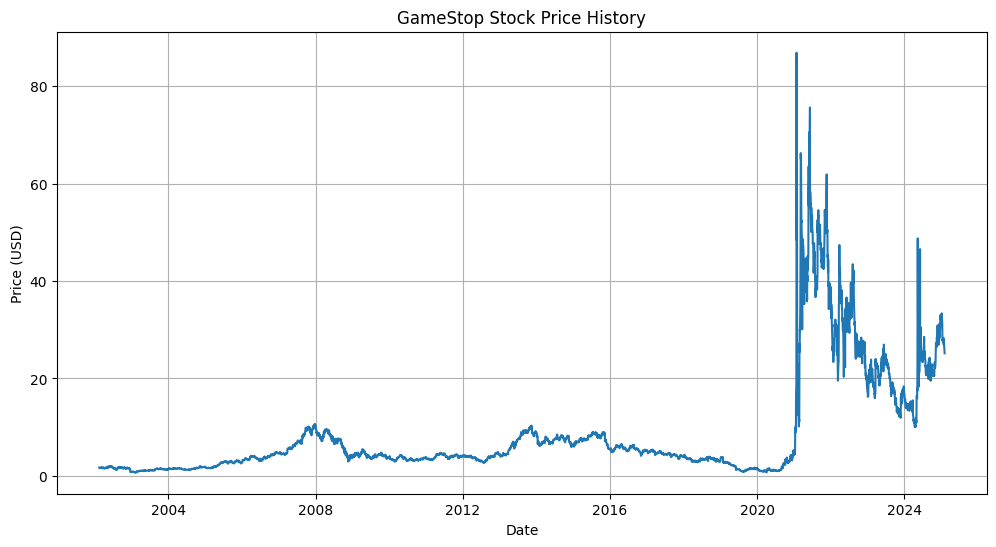

In [ ]:
# Use the GME DataFrame from Question 3
make_graph(gme_data, "GameStop Stock Price History", "gme_stock.png")